In [1]:
import numpy as np
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib
import json, math
from operator import sub
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

In [2]:
########## PARAMS ##########
num_runs = 10
diss_rate_target = 0.99
aoi_target = 0.01
v = 43
frame_count = 5

density_low = 4.59598735
density_high = 11.95521146

q = 200
p = 50

i_rdf = 120
i_pf = 60
i_sf = 120
i_cbf = 120

nn = np.arange(100, 800, 25)

########## UTIL FUNCTIONS ##########

def get_aspect(ax):
    # Total figure size
    figW, figH = ax.get_figure().get_size_inches()
    # Axis size on figure
    _, _, w, h = ax.get_position().bounds
    # Ratio of display units
    disp_ratio = (figH * h) / (figW * w)
    # Ratio of data units
    # Negative over negative because of the order of subtraction
    data_ratio = sub(*ax.get_ylim()) / sub(*ax.get_xlim())

    return disp_ratio / data_ratio

def calculate_confidence_interval(data, confidence=.99):
    n = len(data)
    m = np.mean(data)
    std_dev = scipy.stats.sem(data)
    h = std_dev * scipy.stats.t.ppf((1 + confidence) / 2, n - 1)
    return [m, h]

def cis_overlap(l_1, h_1, l_2, h_2):
    return (l_1 >= l_2 and l_1 <= h_2) or (h_1 >= l_2 and h_1 <= h_2)

def is_successful_config(diss_rate, excess_probability, config):
    return diss_rate[config] >= diss_rate_target and excess_probability[config] <= aoi_target

def get_rdf_config_performance(n,i,q):
    diss_rate = []
    excess_probability = []

    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_r{r}.json', 'r') as f:
                data = json.load(f)
                diss_rate.append(data['avg_dissemination_rate'])
                excess_probability.append(data['excess_probability_1_R_peak'])
        except:
            errors += 1

    if errors == num_runs:
        return (0, 1, 0 ,0)

    (avg_diss_rate, diss_rate_ci) = calculate_confidence_interval(diss_rate)
    (excess_probability, excess_probability_ci) = calculate_confidence_interval(excess_probability)
    return (avg_diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)


def get_sf_config_performance(n,i,p):
    diss_rate = []
    excess_probability = []
    
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_sf_n{n}_i{i}_p{p}_r{r}.json', 'r') as f:
                data = json.load(f)
                diss_rate.append(data['avg_dissemination_rate'])
                excess_probability.append(data['excess_probability_1_R_peak'])
        except:
            errors += 1

    if errors == num_runs:
        print('ERROR')
        return (0, 1, 0, 0)
        
    (avg_diss_rate, diss_rate_ci) = calculate_confidence_interval(diss_rate)
    (excess_probability, excess_probability_ci) = calculate_confidence_interval(excess_probability)
    return (avg_diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)

def get_pf_config_performance(n,i):
    p = 100
    diss_rate = []
    excess_probability = []
    
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_sf_n{n}_i{i}_p{p}_r{r}.json', 'r') as f:
                data = json.load(f)
                diss_rate.append(data['avg_dissemination_rate'])
                excess_probability.append(data['excess_probability_1_R_peak'])
        except:
            errors += 1

    if errors == num_runs:
        print('ERROR')
        return (0, 1, 0, 0)
        
    (avg_diss_rate, diss_rate_ci) = calculate_confidence_interval(diss_rate)
    (excess_probability, excess_probability_ci) = calculate_confidence_interval(excess_probability)
    return (avg_diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)

def get_cbf_config_performance(n,i):
    q = 0
    diss_rate = []
    excess_probability = []
    
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_r{r}.json', 'r') as f:
                data = json.load(f)
                diss_rate.append(data['avg_dissemination_rate'])
                excess_probability.append(data['excess_probability_1_R_peak'])
        except:
            errors += 1

    if errors == num_runs:
        # print('ERROR')
        return (0, 1, 0, 0)
        
    (avg_diss_rate, diss_rate_ci) = calculate_confidence_interval(diss_rate)
    (excess_probability, excess_probability_ci) = calculate_confidence_interval(excess_probability)
    return (avg_diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)


In [3]:
def get_rdf_performance(num_nodes):
    (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci) = get_rdf_config_performance(num_nodes, i_rdf, q)
    return (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)

def get_sf_performance(num_nodes):
    (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci) = get_sf_config_performance(num_nodes, i_sf, p)
    return (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)

def get_pf_performance(num_nodes):
    (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci) = get_pf_config_performance(num_nodes, i_pf)
    return (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)

def get_cbf_performance(num_nodes):
    (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci) = get_cbf_config_performance(num_nodes, i_cbf)
    return (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci)

In [4]:
def get_metrics(get_performance_fkt):
    ep = []
    dr = []
    ep_ci = []
    dr_ci = []

    for n in nn:
        (diss_rate, excess_probability, diss_rate_ci, excess_probability_ci) = get_performance_fkt(n)
        ep.append(excess_probability)
        dr.append(diss_rate)
        ep_ci.append(excess_probability_ci)
        dr_ci.append(diss_rate_ci)

    ep = np.array(ep) * 100
    dr = np.array(dr)* 100
    ep_ci = np.array(ep_ci)* 100
    dr_ci = np.array(dr_ci)* 100
    return (ep, dr, ep_ci, dr_ci)


(sf_ep, sf_dr, sf_ep_ci, sf_dr_ci) = get_metrics(get_sf_performance)
(rdf_ep, rdf_dr, rdf_ep_ci, rdf_dr_ci) = get_metrics(get_rdf_performance)
(pf_ep, pf_dr, pf_ep_ci, pf_dr_ci) = get_metrics(get_pf_performance)
(cbf_ep, cbf_dr, cbf_ep_ci, cbf_dr_ci) = get_metrics(get_cbf_performance)

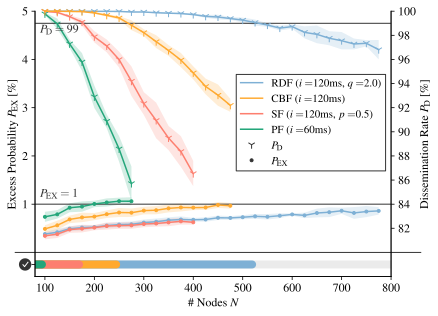

In [5]:
## Plot KPI comparison
ep_max = 5

rdf_color = '#7eb0d5'
sf_color = '#fd7f6f'
pf_color = '#23a67a'
cbf_color = '#ffa92f'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x_max = 800

ax1.plot([40, x_max +60], [0,0], color='#333', lw=1, clip_on=False)
ax1.plot([50, x_max +20], [1,1], color='#333', lw=1)
ax1.text(90, 1.1, '$P_\mathrm{EX} = 1$', ha="left", va="bottom", color="#333", fontsize=12)

ax2.plot([50, x_max +20], [99, 99], color='#333', lw=1)
ax2.text(90, 98.9, '$P_\mathrm{D} = 99$', ha="left", va="top", color="#333", fontsize=12)

ax1.set_xlabel('\# Nodes $N$')
ax1.set_ylabel('Excess Probability $P_\mathrm{EX}$ [\%]')
cbf_max = 16
sf_max = 13
pf_max = 8

## RDF
ax1.plot(nn, rdf_ep, '.-', color=rdf_color)
ax1.fill_between(nn, rdf_ep-rdf_ep_ci, rdf_ep+rdf_ep_ci, facecolor=rdf_color, interpolate=True, alpha=0.2)

## CBF
ax1.plot(nn[0:cbf_max], cbf_ep[0:cbf_max], '.-', color=cbf_color)
ax1.fill_between(nn[0:cbf_max], cbf_ep[0:cbf_max] - cbf_ep_ci[0:cbf_max], cbf_ep[0:cbf_max] + cbf_ep_ci[0:cbf_max], facecolor=cbf_color, interpolate=True, alpha=0.2)

## SF
ax1.plot(nn[0:sf_max], sf_ep[0:sf_max], '.-', color=sf_color)
ax1.fill_between(nn[0:sf_max], sf_ep[0:sf_max] - sf_ep_ci[0:sf_max], sf_ep[0:sf_max] + sf_ep_ci[0:sf_max], facecolor=sf_color, interpolate=True, alpha=0.2)

## PF
ax1.plot(nn[0:pf_max], pf_ep[0:pf_max], '.-', color=pf_color)
ax1.fill_between(nn[0:pf_max], pf_ep[0:pf_max] - pf_ep_ci[0:pf_max], pf_ep[0:pf_max] + pf_ep_ci[0:pf_max], facecolor=pf_color, interpolate=True, alpha=0.2)

ax1.tick_params(axis='y')
ax1.set_ylim(-0.5, ep_max * 1.0)
ax1.set_xlim(80, x_max)
ax1.set_yticks([-0.25] + list(np.arange(1, ep_max + 1, 1)))
ax1.set_yticklabels([''] + list(range(1, ep_max + 1)))

ax2.set_ylabel('Dissemination Rate $P_\mathrm{D}$ [\%]')

ax2.plot(nn, rdf_dr, '1-', ms=8, color=rdf_color, clip_on=False)
ax2.fill_between(nn, rdf_dr - rdf_dr_ci, rdf_dr + rdf_dr_ci, facecolor=rdf_color, interpolate=True, alpha=0.2)

ax2.plot(nn[0:sf_max], sf_dr[0:sf_max], '1-', ms=8, color=sf_color, clip_on=False)
ax2.fill_between(nn[0:sf_max], sf_dr[0:sf_max] - sf_dr_ci[0:sf_max], sf_dr[0:sf_max] + sf_dr_ci[0:sf_max], facecolor=sf_color, interpolate=True, alpha=0.2)

ax2.plot(nn[0:pf_max], pf_dr[0:pf_max], '1-', ms=8, color=pf_color, clip_on=False)
ax2.fill_between(nn[0:pf_max], pf_dr[0:pf_max] - pf_dr_ci[0:pf_max], pf_dr[0:pf_max] + pf_dr_ci[0:pf_max], facecolor=pf_color, interpolate=True, alpha=0.2)

ax2.plot(nn[0:cbf_max], cbf_dr[0:cbf_max], '1-', ms=8, color=cbf_color, clip_on=False)
ax2.fill_between(nn[0:cbf_max], cbf_dr[0:cbf_max] - cbf_dr_ci[0:cbf_max], cbf_dr[0:cbf_max] + cbf_dr_ci[0:cbf_max], facecolor=cbf_color, interpolate=True, alpha=0.2)


n_max_rdf = 0
n_max_cbf = 0
n_max_sf = 0
n_max_pf = 0

for i in range(len(nn)):
    n = nn[i]
    rdf_ep_target_met = rdf_ep[i] <= aoi_target * 100
    rdf_dr_target_met = rdf_dr[i] >= diss_rate_target * 100
    sf_ep_target_met = sf_ep[i] <= aoi_target * 100
    sf_dr_target_met = sf_dr[i] >= diss_rate_target * 100
    cbf_ep_target_met = cbf_ep[i] <= aoi_target * 100
    cbf_dr_target_met = cbf_dr[i] >= diss_rate_target * 100
    pf_ep_target_met = pf_ep[i] <= aoi_target * 100
    pf_dr_target_met = pf_dr[i] >= diss_rate_target * 100

    if rdf_ep_target_met and rdf_dr_target_met:
        n_max_rdf = n
        
    if cbf_ep_target_met and cbf_dr_target_met:
        n_max_cbf = n

    if sf_ep_target_met and sf_dr_target_met:
        n_max_sf = n

    if pf_ep_target_met and pf_dr_target_met:
        n_max_pf = n

ax1aspect = get_aspect(ax1)
circle_width = 25
circle_center = 60
t1 = matplotlib.patches.Ellipse((circle_center ,-0.25), width=circle_width, height=circle_width / ax1aspect, fill=True, fc='#333', lw=0, ec='#fff', clip_on=False)
ax1.add_patch(t1)
check_x = circle_center + np.array([-2.3, -0.6, 3]) * 1.9
check_y = (np.array([-12.39882697947214, -14.382639296187682, -9.919061583577713]) *2 / ax1aspect) 
ax1.plot(check_x, check_y, color='#fff', lw=1, clip_on=False)

cap_offset = 6
ax1.plot([0, 800], [-0.25, -0.25], color='#ebebeb', solid_capstyle='round', lw=8)   
ax1.plot([0, n_max_rdf -cap_offset], [-0.25, -0.25], color=rdf_color, solid_capstyle='round', lw=8)
ax1.plot([0, n_max_cbf-cap_offset], [-0.25, -0.25], color=cbf_color, solid_capstyle='round', lw=8)
ax1.plot([0, n_max_sf-cap_offset], [-0.25, -0.25], color=sf_color, solid_capstyle='round', lw=8)
ax1.plot([0, n_max_pf-cap_offset], [-0.25, -0.25], color=pf_color, solid_capstyle='round', lw=8)

# tick_height = 0.07
# for n in nn:
#     ax1.plot([n,n],[-0.25-tick_height, -0.25+tick_height], color='#333', lw=0.5)


ax2.tick_params(axis='y')
ax2.set_ylim(78, 100)
ax2.set_xlim(80, x_max)
ax2.set_yticks(np.arange(82, 101, 2))
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

plt.plot([-1],[0], label=f'RDF ($i=${i_rdf}ms, $q=${q/100})', color=rdf_color)
plt.plot([-1],[0], label=f'CBF ($i=${i_cbf}ms)', color=cbf_color)
plt.plot([-1],[0], label=f'SF ($i=${i_sf}ms, $p=${p/100})', color=sf_color)
plt.plot([-1],[0], label=f'PF ($i=${i_pf}ms)', color=pf_color)
plt.plot([-1],[0], '1', ms=8, label='$P_\mathrm{D}$', color='#333')
plt.plot([-1],[0], '.',label='$P_\mathrm{EX}$', color='#333')
leg = plt.legend(fancybox=False, loc=7, bbox_to_anchor=(1, 0.58), framealpha=1.0, prop={'size': 11})
leg.get_frame().set_edgecolor('#333')

fig.savefig(f"../figures/single_config_performance_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/single_config_performance_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)

plt.show()

In [6]:
print('Done')

Done
